# Instituto Federal do Sudeste de Minas Gerais, Campus Barbacena

# Minicurso: Introdução a word embeddings


## 1. Escolha de um dataset


### 1.1 Modelo pronto x Modelo Próprio

Um dos modelos pré-treinados mais conhecidos foi o modelo treinado pela equipe do google, que utilizou 300 milhoes de sentenças e um vocabulario de 100 bilhões de palavras. Apesar de ser um modelo com otimos resultados, não pode ser aplicado a toda e qualquer solução. Quando se pretende trabalhar com um contexto específico, é mais interessante treinar o proprio modelo utilizando um dataset especifico para esse contexto.


### 1.2 Criar seu Dataset x Usar Dataset Pronto

Existe uma variedade de datasets prontos disponíveis para uso, mas você tamém pode criar o seu próprio dataset, utilizando web scraping ou acessando alguma API.


Alguns exemplos de datasets podem ser encotrados acessando o seguinte link:
https://www.kaggle.com/datasets





## 2. Pré-processamento de textos
Essencial no processamento de linguagem natural. Consiste em prepara e/ou limpar o texto que ele possa ser , de fato, processado por um computador.

In [1]:
# Usaremos um data set simples com algumas frases para as primeiras etapas do curso
sentencas =  ['King is a strong man!', 
          'Queen is a wise woman!', 
          'Is this man strong?', 
          'Is this Woman pretty?',
          'Prince is a boy that will be King.',
          'Princess is a girl that will be Queen.']

import pandas as pd
#Transformando a lista em um dataframe pandas
df = pd.DataFrame(sentencas)

#Alterando o nome da coluna do dataframe
df.columns = ['frase']

#Exibindo as primeiras linhas do dataframe, é possível alterar o numero de linhas exibido passando um valor como parâmetro para a função head
df.head()

,frase
0,King is a strong man!
1,Queen is a wise woman!
2,Is this man strong?
3,Is this Woman pretty?
4,Prince is a boy that will be King.


### 2.1 Conversão para minúsculas


In [2]:
df['frase'][0].lower()

'king is a strong man!'

### 2.2 Removendo pontuação e caracteres especiais

In [3]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
# Transformando uma string em uma lista
pontuacao = list(punctuation)

# Adicionando alguns caracteres que percebi ser necessários ao lidar com outros datasets passados
pontuacao.append('\"')
pontuacao.append('\'')
pontuacao.append('``')
pontuacao.append('`')
pontuacao.append('\n')
pontuacao.append('\t')
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '"',
 "'",
 '``',
 '`',
 '\n',
 '\t']

In [5]:
''.join([l for l in df['frase'][0] if l not in punctuation])

'King is a strong man'

### 2.3 Usando expressão regular pra remover numeros

In [6]:
# Substituição de numeros com expressões regulares
exemplo = 'A volta dos que não foram 2 - O retorno'
import re
' '.join([l for l in exemplo.split() if not re.search('^\d', l)]) 

'A volta dos que não foram - O retorno'

### 2.4 Removendo acentuação

In [7]:
from unidecode import unidecode
# Removendo a acentuação de palavras
unidecode( exemplo )

'A volta dos que nao foram 2 - O retorno'

### 2.5 Removendo stopwords

Stopwords são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma search engine.

Vão existir casos onde palavras que não são stopwords em um contexto geral, serão consideradas stopwords em um contexto específico.

In [8]:
import nltk
# Stopwords em português
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[0:10]

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para']

In [9]:
# Stopwords em inglês
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### 2.6 Stemming
Redução de termos ao radical. Util em alguns casos mas deve ser usado com cautela.

In [10]:
# Versão aprimorada do algoritmo de Porter
from nltk.stem import SnowballStemmer

# Lista de linguagens possíveis
" ".join(SnowballStemmer.languages)

'arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish'

In [11]:
# Exemplo de Stemming aplicado ao português
stemmer = SnowballStemmer("portuguese")
print(stemmer.stem("programa"), stemmer.stem("programar"), stemmer.stem("programando"), stemmer.stem("programava"))

program program program program


In [12]:
# Exemplo de Stemming aplicado ao inglês
stemmer = SnowballStemmer("english")
print(stemmer.stem("consign"), stemmer.stem("consigned"), stemmer.stem("consigning"), stemmer.stem("consignment"))

consign consign consign consign


In [13]:
# Exemplo de problema que pode ser encontrado ao usar stemming
# 2 palavras com significados diferentes que após o stemming passam a ter o mesmo significado.
stemmer = SnowballStemmer("english")
print(stemmer.stem("import"), stemmer.stem("important"))

import import


### Vale ressaltar que não utilizaremos todas as técnicas em qualquer caso. Cada dataset e cada aplicação tem suas peculiaridades e essas devem ser observadas antes da escolha das técnicas.

### 2.7 Gerando um Corpus


In [14]:
from nltk import word_tokenize
# Função que recebe uma string e retorna a mesma processada
def processa(txt):
    return ' '.join([t for t in word_tokenize(txt.lower()) if (len(t)>2) if not re.search('^\d', t) and (t not in stopwords) and (t not in pontuacao)])

In [15]:
corpus = []
for i in df.iterrows():
    corpus.append(processa(i[1]['frase']).split())

In [16]:
corpus

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

## 3. Word2Vec

Word2vec é um par de modelos de aprendizado não supervisionado para criação de uma representação vetorial de palavras presentes em textos que usam linguagem natural.

Vale ressaltar que existem outros modelos de word embedding a ser estudados, entre os mais conhecidos estão o GloVe e o fasttext do facebook.


### 3.1 Parâmetros

**size:** A dimensionalidade dos vetores densos utilizados para representar cada token ou palavra. 

**window:** A distância maxima entre uma determinada palavra ( target) e palavras vizinhas que serão consideradas para contruir o contexto da palavra target. Quando essa distancia é menor o conceito ligado a uma pelavra é mais específico e quando é maior, o conceito tende a ser mais genérico.

**min_count:** Ignora palavras com a frequencia total inferior ao valor estipulado por esse parâmetro. O valor padrão desse parâmetro é 5, ou seja, palavras que se repetem menos de 5 vezes não serão adicionados ao vocabulário do modelo.

**sg:** Define o algoritmo que será utilizado para treinamento ( 0 para CBOW e 1 para Skip-Gram).

**workers:** Numero de threads que serça usadas pra treinar, diretamente ligado ao desempenho.

**iter:** Numero de iterações sobre o corpus.


Link explicando cada parâmetro: https://radimrehurek.com/gensim/models/word2vec.html


### 3.2 Criando o modelo e o vocabulário


In [50]:
from gensim.models import Word2Vec
import numpy as np
np.random.seed(0)
os.
# Definição dos parâmetros e criação do modelo
modelo = Word2Vec(corpus, size=20, window=2,  min_count=0 ,workers=1, sg=1, iter=100)

In [51]:
# Nessa etapa o vocabulário do modelo ja foi criado e um vetor ja foi definido para cada palavra.
modelo.wv.vocab

{'king': <gensim.models.keyedvectors.Vocab at 0x7f61109687f0>,
 'strong': <gensim.models.keyedvectors.Vocab at 0x7f61109686a0>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7f61109686d8>,
 'queen': <gensim.models.keyedvectors.Vocab at 0x7f6110968748>,
 'wise': <gensim.models.keyedvectors.Vocab at 0x7f6110968710>,
 'woman': <gensim.models.keyedvectors.Vocab at 0x7f61109685c0>,
 'pretty': <gensim.models.keyedvectors.Vocab at 0x7f61109685f8>,
 'prince': <gensim.models.keyedvectors.Vocab at 0x7f6110968668>,
 'boy': <gensim.models.keyedvectors.Vocab at 0x7f6110968630>,
 'princess': <gensim.models.keyedvectors.Vocab at 0x7f61109684e0>,
 'girl': <gensim.models.keyedvectors.Vocab at 0x7f6110968518>}

In [52]:
# Exemplo de vetor que representa uma palavra
modelo.wv['king']

array([-0.02301328,  0.00496967,  0.01754328, -0.00665839,  0.02450039,
       -0.0167828 , -0.01081421, -0.01123193,  0.01645829,  0.01581936,
        0.02091113, -0.00755061, -0.00068808, -0.00151947,  0.02199668,
       -0.01702223,  0.00382574,  0.00458455,  0.00337589, -0.00897763],
      dtype=float32)

In [53]:
# Exemplo de vetor que representa uma palavra
len(modelo.wv['king'])

20

### 3.3 Treinando o modelo

In [54]:
modelo.train(corpus, total_examples=len(corpus), epochs=100)

(191, 1600)

### 3.4 Plotando um gráfico de distribuição

In [55]:
#funçao pra plotar um grafico de dispersão das palavras
def plota_grafico(modelo):
    from sklearn.decomposition import PCA
    from matplotlib import pyplot
    # fit a 2d PCA model to the vectors
    X = modelo[modelo.wv.vocab]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    words = list(modelo.wv.vocab)
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()

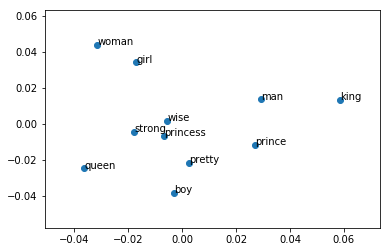

In [56]:
plota_grafico(modelo)

### 3.5 Salvando o modelo

O ideal é salvar o modelo assim que terminar de treinar, e depois carregar apenas os vetores, poupando memoria RAM e ganhando desempenho.

In [57]:
#salvando o modelo no diretorio corrente
modelo.save('./modelo_teste')

### 3.6 Carregando modelos

Na maioria das aplicações que utilizam o word2vec, são usados modelos prontos e pré-treinados. Porém, esses modelos não se aplicam a toda e qualquer aplicação visto que a aplicação pode ser voltada para um contexto específico.

In [58]:
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings('ignore')

#Carrregando os vetores
word_vectors = KeyedVectors.load('./modelo_teste', mmap='r')

### 3.7 Testes

### 3.7.1 Mais similares

In [59]:
# A similaridade é um valor entre 0 e 1, pois é calculada usando o coseno da distância entre 2 palavras.
# Palavras iguais, estão no mesmo lugar dentro do espaço vetorial, portanto a distancia entre elas é 0 e o coseno de 0 é 1.
word_vectors.similarity(w1='man', w2='man')

1.0

In [60]:
# Busca a palavra
word_vectors.most_similar(positive=['prince'], topn=1)

[('strong', 0.3469914197921753)]

In [61]:
word_vectors.most_similar(positive=['woman'], topn=1,)

[('girl', 0.2629024088382721)]

### 3.7.2 Analogias

In [74]:
word_vectors.most_similar(positive=['king', 'pretty'], negative=['strong'], topn=1)

[('prince', 0.13659892976284027)]

In [69]:
word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('princess', 0.22944176197052002)]

### 3.7.3 Odd-One-Out

Exclui a palavra  que está fora do contexto, ou a palavra mais distante do contexto geral.


In [64]:
word_vectors.doesnt_match(['king', 'queen', 'girl'])

'king'

In [65]:
word_vectors.doesnt_match(['prince', 'princess', 'king'])

'princess'

In [66]:
word_vectors.doesnt_match(['king', 'queen', 'woman'])

'king'

In [67]:
word_vectors.doesnt_match(['king', 'prince', 'strong'])

'king'